In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 9.10
**Job proficiency**. A personnel officer in a governmental agency administered four newly developed aptitude tests to each of 25 applicants for entry-level clerical positions in the agency.
For purpose of the study, all 25 applicants were accepted for positions irrespective of their test
scores. After a probationary period, each applicant was rated for proficiency on the job. The
scores on the four tests (X1, X2, X3, X4) and the job proficiency score (Y ) for the 25 employees
were as follows: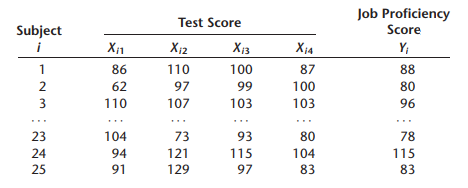

a. Prepare separate stem-and-leaf plots of the test scores for each of the four newly developed
aptitude tests. Are there any noteworthy features in these plots? Comment.

b. Obtain the scatter plot matrix. Also obtain the correlation matrix of the X variables. What do
the scatter plots suggest about the nature of the functional relationship between the response
variable Y and each of the predictor variables? Are any serious multicollinearity problems
evident? Explain.

c. Fit the multiple regression function containing all four predictor variables as first-order
terms. Does it appear that all predictor variables should be retained?

In [11]:
df = pd.read_csv('CH09PR10.txt', sep = '\s+', header =None, names=['Y', 'X1', 'X2', 'X3', 'X4'])
df.head()

,Y,X1,X2,X3,X4
0,88.0,86.0,110.0,100.0,87.0
1,80.0,62.0,97.0,99.0,100.0
2,96.0,110.0,107.0,103.0,103.0
3,76.0,101.0,117.0,93.0,95.0
4,80.0,100.0,101.0,95.0,88.0


### a. Prepare separate stem-and-leaf plots of the test scores for each of the four newly developed aptitude tests. Are there any noteworthy features in these plots? Comment.

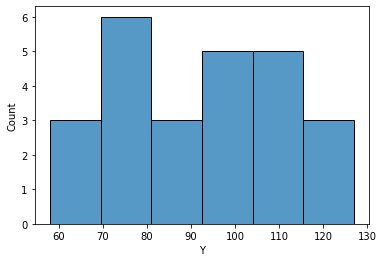

In [12]:
sns.histplot(data=df['Y']);

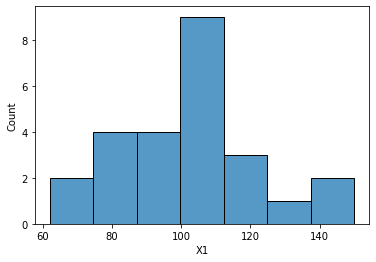

In [13]:
sns.histplot(data=df['X1']);

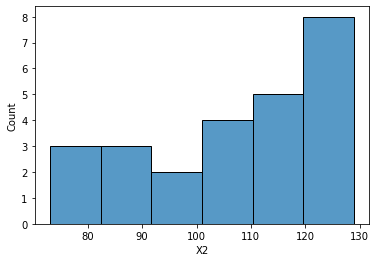

In [14]:
sns.histplot(data=df['X2']);

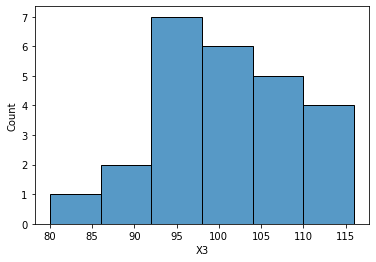

In [15]:
sns.histplot(data=df['X3']);

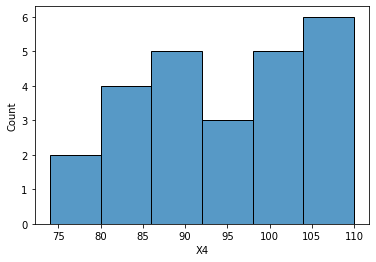

In [16]:
sns.histplot(data=df['X4']);

#### => We can conclude that there are no outliers in these variables because the values of X1,X2,X3,X4 are distributed quite evenly.

### b. Obtain the scatter plot matrix. Also obtain the correlation matrix of the X variables. What do the scatterplots suggest about the nature of the functional relationship between the response variable Y and eachof the predictor variables? Are any serious multicollinearity problems evident? Explain

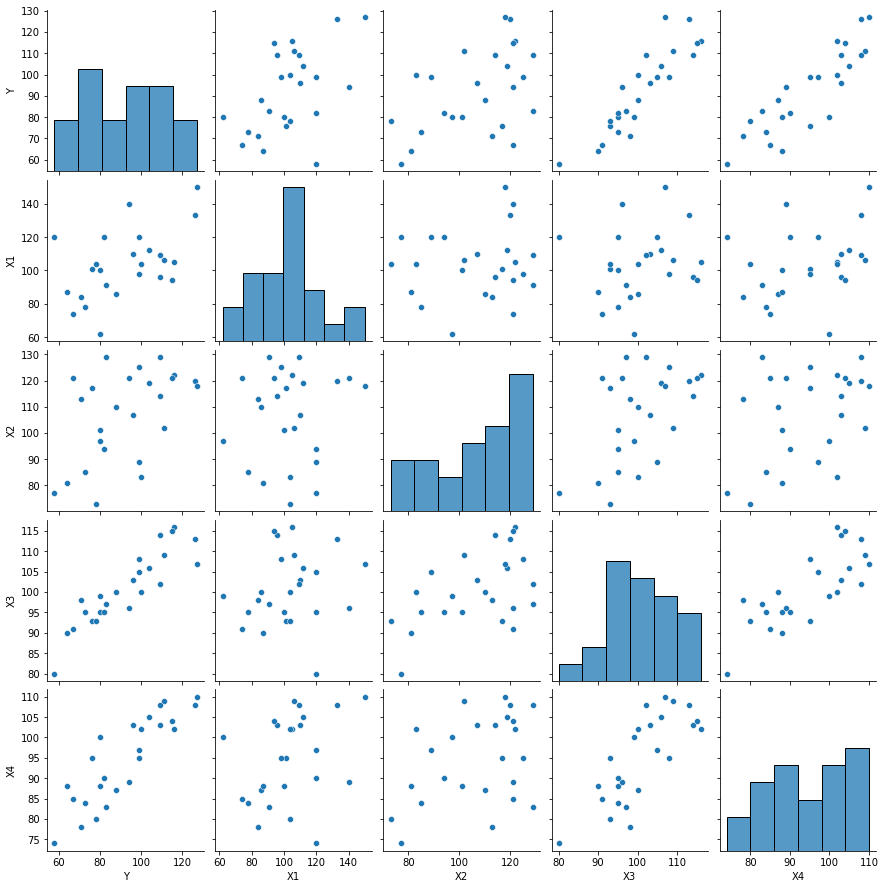

In [17]:
sns.pairplot(data=df);

In [18]:
matrix = df.corr()
print(matrix)

           Y        X1        X2        X3        X4
Y   1.000000  0.514411  0.497006  0.897064  0.869387
X1  0.514411  1.000000  0.102269  0.180769  0.326663
X2  0.497006  0.102269  1.000000  0.519045  0.396710
X3  0.897064  0.180769  0.519045  1.000000  0.782038
X4  0.869387  0.326663  0.396710  0.782038  1.000000


#### => The scatter plot matrix shows that X1 and X2 appears to have a modest linear association with Y (0.514410 and 0.497006, respectively). It's also shows that X3 and X4 have the strongest linear relationships with Y (0.897064 and 0.869387, respectively).Aside from that, X3 and X4 appear to have major multiconlinear issues (0.782038).

### c. Fit the multiple regression function containing all four predictor variables as first-order terms. Does it appear that all predictor variables should be retained?

In [20]:
y = df['Y']
x1 = df['X1']
x2 = df['X2']
x3 = df['X3']
x4= df['X4']
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('y ~ x1+x2+x3+x4', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.26e-14
Time:                        22:14:06   Log-Likelihood:                -67.951
No. Observations:                  25   AIC:                             145.9
Df Residuals:                      20   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.3818      9.941    -12.512      0.000    -145.119    -103.645
x1             0.2957      0.044      6.725      0.000       0.204       0.387
x2             0.0483      0.057      0.853      0.404      -0.070       0.166
x3             1.3060      0.164      7.959      0.000       0.964       1.648
x4             0.5198      0.132      3.940      0.001       0.245       0.795
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                1.419
Skew:                           0.139   Prob(JB):                        0.492
Kurtosis:                       1.867   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
results.params

Intercept   -124.381821
x1             0.295725
x2             0.048288
x3             1.306011
x4             0.519819
dtype: float64

#### Y= -124.381821+ 0.295725X1+0.048288X2+ 1.306011X3 + 0.519819X4
#### P-value = 5.26e-14 > 0.05, so we can conclude H0 => it appear that all predictor variables should be retained

# 9.18
 Refer to Job proficiency Problems 9.10 and 9.11.

a. Using forward stepwise regression, find the best subset of predictor variables to predict job
proficiency. Use α limits of .05 and .10 for adding or deleting a variable, respectively.

b. How does the best subset according to forward stepwise regression compare with the best
subset according to the R2
a,p criterion obtained in Problem 9.11a?

# 9.22. 
Refer to Job proficiency Problems 9.10 and 9.18. To assess externally the validity of the
regression model identified in Problem 9.18, 25 additional applicants for entry-level clerical
positions in the agency were similarly tested and hired irrespective of their test scores. The data
follow.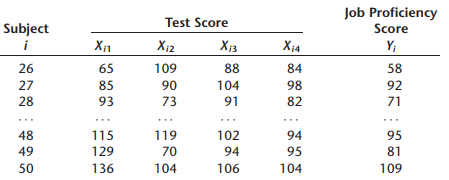

a. Obtain the correlation matrix of the X variables for the validation data set and compare it
with that obtained in Problem 9.10b for the model-building data set. Are the two correlation
matrices reasonably similar?

b. Fit the regression model identified in Problem 9.18a to the validation data set. Compare the
estimated regression coefficients and their estimated standard deviations to those obtained
in Problem 9.18a. Also compare the error mean squares and coefficients of multiple determination. Do the estimates for the validation data set appear to be reasonably similar to
those obtained for the model-building data set?

c. Calculate the mean squared prediction error in (9.20) and compare it to MSE obtained from
the model-building data set. Is there evidence of a substantial bias problem in MSE here? Is
this conclusion consistent with your finding in Problem 9.21? Discuss.

d. Combine the model-building data set in Problem 9.10 with the validation data set and fit the
selected regression model to the combined data. Are the estimated standard deviations of
the estimated regression coefficients appreciably reduced now from those obtained for the
model-building data set?

### a. Obtain the correlation matrix of the X variables for the validation data set and compare it with that obtained in Problem 9.10b for the model-building data set. Are the two correlation matrices reasonably similar?

In [36]:
df1 = pd.read_csv('CH09PR22.txt', sep = '\s+', header =None, names=['Y', 'X1', 'X2', 'X3', 'X4'])
df1.head()

,Y,X1,X2,X3,X4
0,58.0,65.0,109.0,88.0,84.0
1,92.0,85.0,90.0,104.0,98.0
2,71.0,93.0,73.0,91.0,82.0
3,77.0,95.0,57.0,95.0,85.0
4,92.0,102.0,139.0,101.0,92.0


In [37]:
matrix = df1.corr()
print(matrix)

           Y        X1        X2        X3        X4
Y   1.000000  0.537078  0.344774  0.888052  0.887939
X1  0.537078  1.000000  0.010571  0.177289  0.319639
X2  0.344774  0.010571  1.000000  0.343744  0.220764
X3  0.888052  0.177289  0.343744  1.000000  0.871447
X4  0.887939  0.319639  0.220764  0.871447  1.000000


In [38]:
matrix = df.corr()
print(matrix)

           Y        X1        X2        X3        X4
Y   1.000000  0.514411  0.497006  0.897064  0.869387
X1  0.514411  1.000000  0.102269  0.180769  0.326663
X2  0.497006  0.102269  1.000000  0.519045  0.396710
X3  0.897064  0.180769  0.519045  1.000000  0.782038
X4  0.869387  0.326663  0.396710  0.782038  1.000000


#### => The two correlation matrices are reasonably similar. The correlation between X1 and X2 increases somewhat, as does the connection between X2 and Y, whereas the correlation between X2 and X4 decreases. The linear link between X3, X4 and Y grows, as do the multicollinear issues of X3 and X4.

### b. Fit the regression model identified in Problem 9.18a to the validation data set. Compare the estimatedregression coefficients and their estimated standard deviations to those obtained in Problem 9.18a. Also compare the error mean squares and coefficients of multiple determination. Do the estimates for thevalidation data set appear to be reasonably similar to those obtained for the model-building data set?

#### model1

In [56]:
y = df1['Y']
x1 = df1['X1']
x2 = df1['X2']
x3 = df1['X3']
x4= df1['X4']
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('y ~ x1+x3+x4', data=df1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     130.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.02e-13
Time:                        23:13:22   Log-Likelihood:                -69.668
No. Observations:                  25   AIC:                             147.3
Df Residuals:                      21   BIC:                             152.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -122.7671     11.848    -10.362      0.000    -147.406     -98.128
x1             0.3124      0.047      6.605      0.000       0.214       0.411
x3             1.4068      0.233      6.048      0.000       0.923       1.891
x4             0.4284      0.197      2.169      0.042       0.018       0.839
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.842
Skew:                          -0.449   Prob(JB):                        0.657
Kurtosis:                       2.944   Cond. No.                     2.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
sse = np.sum((results1.fittedvalues - df1.Y)**2)
mse = sse/(n-4)
print('MSE=',mse)

MSE= 18.35493450991355


* Adj. R-squared:	0.942
* **Y= -122.7671+ 0.3124X1 + 1.4068X3 + 0.4284X4**
* MSE= 18.35493450991355

#### model2

In [58]:
y = df['Y']
x1 = df['X1']
x2 = df['X2']
x3 = df['X3']
x4= df['X4']
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('y ~ x1+x3+x4', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     175.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.16e-15
Time:                        23:13:27   Log-Likelihood:                -68.397
No. Observations:                  25   AIC:                             144.8
Df Residuals:                      21   BIC:                             149.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.2000      9.874    -12.578      0.000    -144.734    -103.666
x1             0.2963      0.044      6.784      0.000       0.205       0.387
x3             1.3570      0.152      8.937      0.000       1.041       1.673
x4             0.5174      0.131      3.948      0.001       0.245       0.790
==============================================================================
Omnibus:                        2.687   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.314
Skew:                           0.154   Prob(JB):                        0.519
Kurtosis:                       1.920   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
sse = np.sum((results.fittedvalues - df.Y)**2)
mse = sse/(n-4)
print('MSE=',mse)

MSE= 16.580809888523795


* Adj. R-squared:	0.956
* **Y= 124.2000+ 0.2963X1 + 1.3570X3 + 0.5174X4**
* MSE= 16.580809888523795

#### Model 1 and Model 2 produce similar results; however, Model 1 has a larger MSE.

### c. Calculate the mean squared prediction error in (9.20) and compare it to MSE obtained from the model-building data set. Is there evidence of a substantial bias problem in MSE here? Is this conclusion consistent with your finding in Problem 9.21? Discuss.

### d. Combine the model-building data set in Problem 9.10 with the validation data set and fit the selectedregression model to the combined data. Are the estimated standard deviations of the estimatedregression coefficients appreciably reduced now from those obtained for the model-building data set?